In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# use seaborn plotting defaults
import seaborn as sns
from scipy import stats

sns.set()

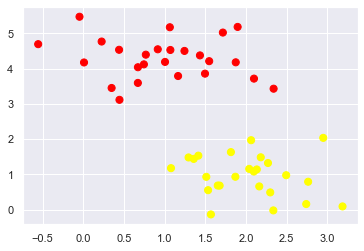

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn");

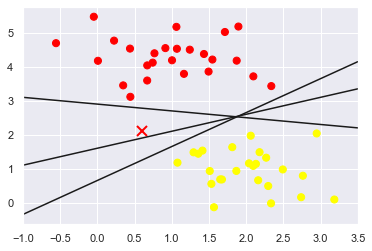

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, "-k")

plt.xlim(-1, 3.5);

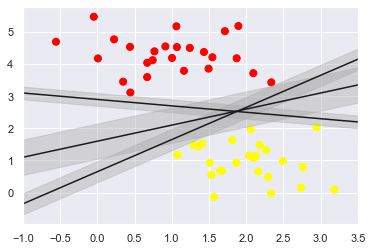

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(
        xfit, yfit - d, yfit + d, edgecolor="none", color="#AAAAAA", alpha=0.4
    )

plt.xlim(-1, 3.5);

In [6]:
from sklearn.svm import SVC  # "Support vector classifier"

model = SVC(kernel="linear", C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [40]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    print(P.shape)

    # plot decision boundary and margins
    ax.contour(
        X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300,
            linewidth=1,
            facecolors="none",
            color="k",
            linestyle="--",
        )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

(30, 30)


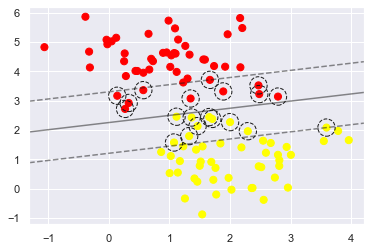

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(model, plot_support=True);

In [42]:
model.support_vectors_

array([[0.26604148, 2.71915015],
       [1.34880003, 3.07479238],
       [1.88779063, 3.31592667],
       [0.13742771, 3.16777298],
       [2.79207378, 3.14029479],
       [2.48279064, 3.22558008],
       [2.47031647, 3.52196502],
       [1.66781904, 3.71005531],
       [0.32575305, 2.92276125],
       [0.56762597, 3.35928158],
       [3.59362114, 2.08207549],
       [1.46361712, 2.13207534],
       [2.29385806, 1.95877238],
       [1.70714468, 2.37707464],
       [2.00067424, 2.26833784],
       [1.1167688 , 2.45256061],
       [1.65684156, 2.4412893 ],
       [1.36628697, 2.42571562],
       [1.32500974, 1.79127669],
       [1.07491911, 1.57315404]])

(30, 30)
(30, 30)


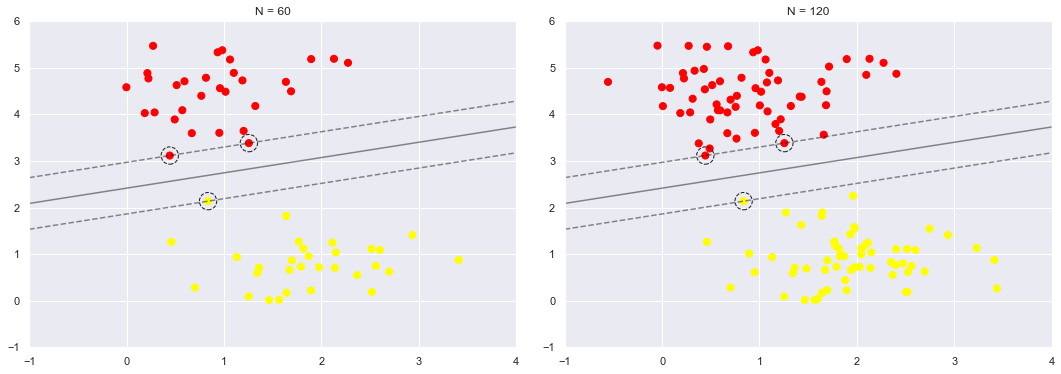

In [43]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel="linear", C=1e10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title("N = {0}".format(N))

In [44]:
from ipywidgets import fixed, interact

interact(plot_svm, N=[10, 50, 100, 200, 1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200, 1000), value=10), Output()), _dom_c…

(30, 30)


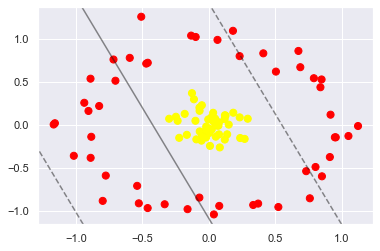

In [45]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf, plot_support=False);

In [46]:
r = np.exp(-(X**2).sum(1))

In [47]:
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")


interact(plot_3D, elev=[-90, -45, 0, 45, 90], azip=np.linspace(-180, 180, 7, endpoint=True), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, -45, 0, 45, 90), value=-90), IntSlider(value=…

In [48]:
clf = SVC(kernel="rbf", C=1e6)
clf.fit(X, y)

SVC(C=1000000.0)

(30, 30)


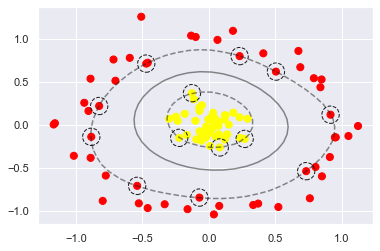

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
plot_svc_decision_function(clf)
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=300,
    lw=1,
    facecolors="none",
);

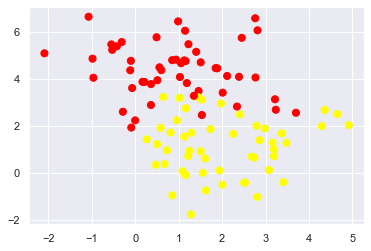

In [50]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn");

(30, 30)
(30, 30)


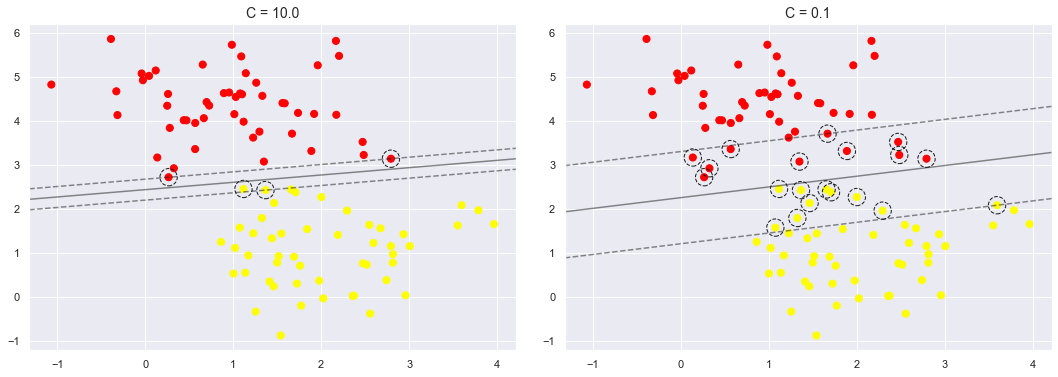

In [51]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    plot_svc_decision_function(model, axi)
    axi.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300,
        lw=1,
        facecolors="none",
    )
    axi.set_title("C = {0:.1f}".format(C), size=14)